In [8]:
# importing the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.datasets import load_iris
import mglearn
%matplotlib inline

In [2]:
# Importing the dataset 
iris=load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print('Feature Names:',iris.feature_names)
print('Target Names:',iris.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [4]:
# Splitting the dataset in train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=42)
print("X_train.shape:{}".format(X_train.shape))
print("X_test.shape:{}".format(X_test.shape))

X_train.shape:(120, 4)
X_test.shape:(30, 4)


In [5]:
# Building pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [6]:
pipe=make_pipeline(StandardScaler(),LogisticRegression())
param_grid={'logisticregression__C':[0.01,0.1,1,10,100]}
grid=GridSearchCV(pipe,param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Grid Search best parameters:{}".format(grid.best_params_))
print("Grid Search best Score:{:.3f}".format(grid.best_score_))
print("Test Result: {}".format(grid.score(X_test,y_test)))

Grid Search best parameters:{'logisticregression__C': 1}
Grid Search best Score:0.958
Test Result: 1.0


In [7]:
from sklearn.metrics import confusion_matrix
y_pred=grid.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [13]:
# Buiding Scatter Plots using PCA
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

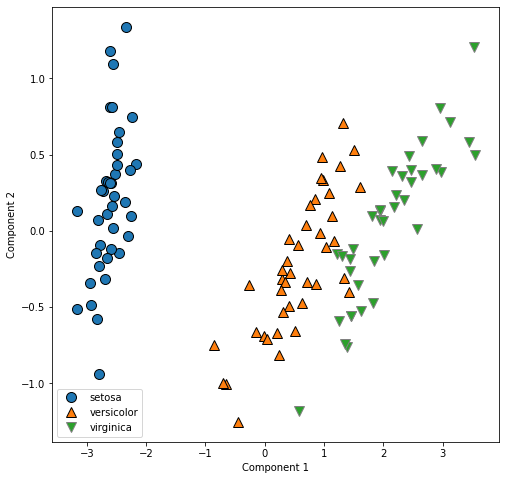

In [12]:
# Matplotlib
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.legend(iris.target_names,loc='best')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

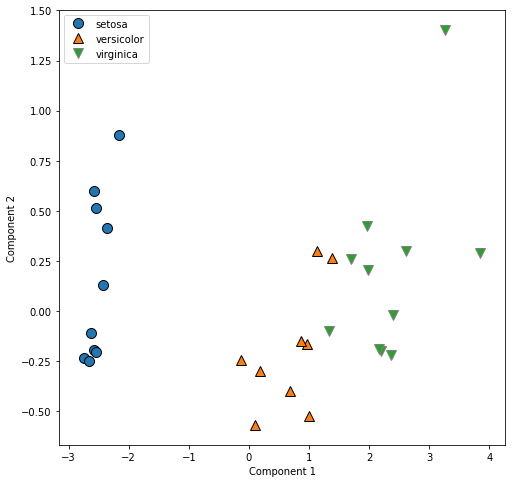

In [14]:
# Plotting
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_test_pca[:,0],X_test_pca[:,1],y_pred)
plt.legend(iris.target_names,loc='best')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()